### Capital Asset Pricing Model (CAPM)

Markowtiz model is working fine but 
we can not get rid of all risk by diversiversification

Two types of risk:
    1. Un systematic risk - this is the risk specific to individual stocks it can be diversified away by increasing the number of stocks in a portfolio
    
    2. Systematic risk or market risk - this risk can not be diversified away ie. interest rates, recssion or war
    
    Captial Asset Pricing Model Measures this Risk
    

The model was formulated in 1960s by William f Sharpe and his colleagues

[Expected return of investment] = [risk free rate of return] + Beta([Expected Market Rate of Return - the Risk free rate of return]

E(r) = rf + b(E[m]- rf)

Linear relationship between any stock expected return and market premium

Ba = Cov(ra,rm)/ var(rm)

According to CAPM beta is the only relevant measure of a stocks risk

Measures the stocks volatility how much the price of a given stock goes up/down compared to that of the whole market.

In portfolio of multiple stocks

Ba = w1b1 + w2B2

E[r) - rf = alpha + Beta(E[rm] - rf)

Linear regression gives the alpha and beta, the slope is the beta and the alpha

alpha is the difference between the actual return and the expected return

alpha = E[r] - (rf+B(E[m]-rf)
    
    
## Why Use Monthly Returns

1. Use daily returns if you want to deal with microscopic data for example holidays Daily returns are superior for short term tatical forecasting
2. For long term models monthly returns are favourable the main benefit is that with monthly data, returns are at least approximately normally distributed
3. Most of the model assume normal distribution

In [1]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/Users/dennismacpro/HelloML/MachineLearning/sample_project/env/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
risk_free_rate = 0.05

In [108]:
stock = pdr.get_data_yahoo('TSLA','2019-01-01',
                        '2020-01-01')

In [109]:
sp500 = pdr.get_data_yahoo('^GSPC','2019-01-01',
                        '2020-01-01')

In [110]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006


In [111]:
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029
2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893
2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941
2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941
2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912


In [112]:
return_stock = stock.resample('M').last()

In [113]:
return_spys = sp500.resample('M').last()

In [114]:
#Create a dataframe from the data - adjusted closing price
stock_data = pd.DataFrame({'s_adjclose': return_stock['Adj Close'],
                         'm_adjclose': return_spys['Adj Close']},
                        index=return_stock.index)

stock_data

,s_adjclose,m_adjclose
Date,,
2019-01-31,307.019989,2704.100098
2019-02-28,319.880005,2784.489990
2019-03-31,279.859985,2834.399902
2019-04-30,238.690002,2945.830078
2019-05-31,185.160004,2752.060059
2019-06-30,223.460007,2941.760010
2019-07-31,241.610001,2980.379883
2019-08-31,225.610001,2926.459961
2019-09-30,240.869995,2976.739990


### Modern Portfolio Theory

Usually we use the natural logarithm as the return !!!!

StockPrice(n) - stockPrice(n-1) /  stockPrice(n-1)

we use the logarithm of returns instead of actual prices of stocks 

To form a normalization : import for machine learning techniques and satistical analysis


log ( stockPrice (n) / stockPrice (n-1) )

In [122]:
#natural logarithm of the returns
# machine learning and statistical anaylsis of the return
# shift method gives us n-1 or yesterdays value
stock_data[['cron_returns','spy_returns']] = np.log(stock_data[['s_adjclose','m_adjclose']]/stock_data[['s_adjclose','m_adjclose']].shift(1))

In [123]:
stock_data = stock_data.dropna()
stock_data.head()

,s_adjclose,m_adjclose,cron_returns,spy_returns
Date,,,,
2019-03-31,279.859985,2834.399902,-0.133657,0.017766
2019-04-30,238.690002,2945.830078,-0.159124,0.038560
2019-05-31,185.160004,2752.060059,-0.253945,-0.068041
2019-06-30,223.460007,2941.760010,0.188012,0.066658
2019-07-31,241.610001,2980.379883,0.078092,0.013043


In [124]:
#covariance matrix the diagnoal terms are the variances
# the off diagonal terms are the covariances
#Estimate a covariance matrix, given data and weights.
#Covariance indicates the level to which two variables vary together.
cov_mat = np.cov(stock_data["cron_returns"], stock_data['spy_returns'])
cov_mat

array([[0.03125171, 0.00381878],
       [0.00381878, 0.0013093 ]])

In [125]:
beta = cov_mat[0,1]/cov_mat[1,1]
beta

2.916648424498784

In [126]:
# using linear regression to fit a line to the data [stock_returns, market_returns]
# slope i the beta
# Least squares polynomial fit.
beta, alpha = np.polyfit(stock_data["cron_returns"],stock_data["spy_returns"],deg=1)
beta, alpha

(0.12219412294803376, 0.011587118215281562)

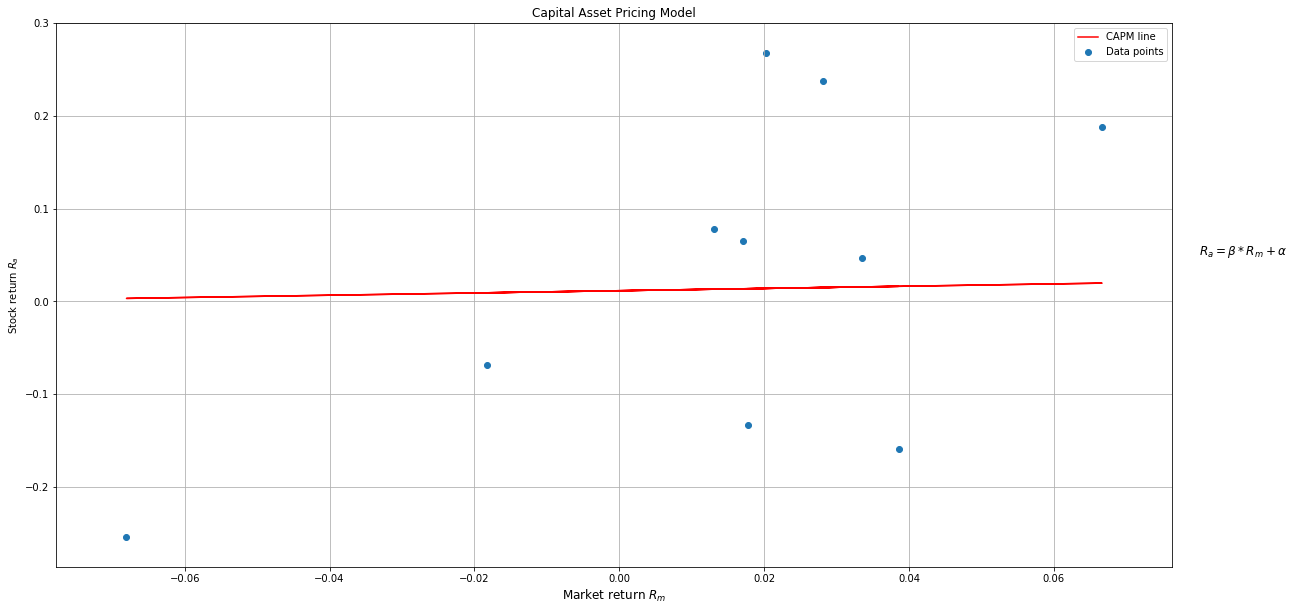

In [127]:
# Ok lets plot this
fig, axis = plt.subplots(1,figsize=(20,10))
axis.scatter(stock_data["spy_returns"], stock_data["cron_returns"],label='Data points')
axis.plot(stock_data["spy_returns"],beta*stock_data["spy_returns"] + alpha, color='red', label='CAPM line')
plt.title('Capital Asset Pricing Model')
plt.xlabel('Market return $R_m$', fontsize=12)
plt.ylabel('Stock return $R_a$')
plt.text(0.08,0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()